In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from astropy import units as u
from astropy import constants as c
import pandas as pd
from matplotlib.animation import FuncAnimation

# Import data from csv file
!wget https://raw.github.com/Aweymouth13/scipi/main/nbody_project/data.csv
# Read in the CSV.
df = pd.read_csv('data.csv')


--2023-12-06 22:20:45--  https://raw.github.com/Aweymouth13/scipi/main/nbody_project/data.csv
Resolving raw.github.com (raw.github.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/Aweymouth13/scipi/main/nbody_project/data.csv [following]
--2023-12-06 22:20:45--  https://raw.githubusercontent.com/Aweymouth13/scipi/main/nbody_project/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3079130 (2.9M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   2.94M  14.1MB/s    in 0.2s    

2023-12-06 22:20:46 (14.1 MB/s) - ‘data.csv’

The inital Center of mass of the system is [7.66502542e+11 7.06819195e+11 7.42684663e+11]
The final Center of mass of the system is [1.33286669e+12 1.25999284e+12 1.27993186e+12]


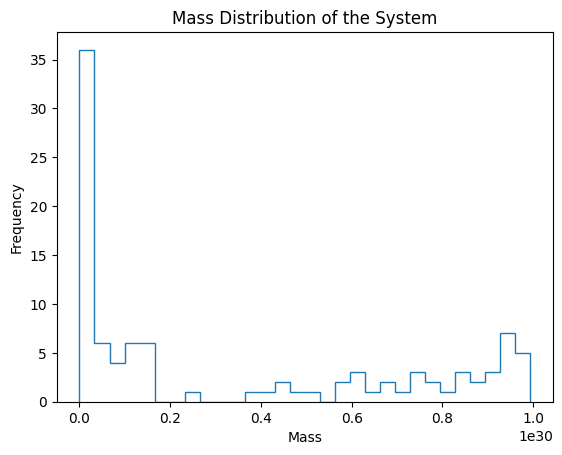

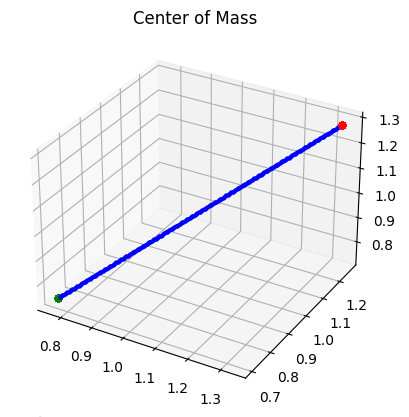

In [2]:
'''
Mass distrabution and center of mass of the system with respect to individual frames
This block will:
- Group the N-body data into the frames of the simulation
- Create the needed weighted sum and total mass arrays to calculate the Center of mass for each frame
- Create Center of Mass function
- Calculate the inital and final center of mass of the system
- Histogram plot the mass distrabution of the system
- 3D plot the center of mass of each frame to show a progression over time
'''
# Group the needed data
groups = df.groupby("frame")
for com, group in groups:
   # Get the x, y, and z functions from the group
   group_pos_x = np.array(group["x_pos"])
   group_pos_y = np.array(group["y_pos"])
   group_pos_z = np.array(group["z_pos"])
   group_pos = np.vstack ([group_pos_x, group_pos_y, group_pos_z])
   #tgroup_pos = np.transpose(group_pos)
   group_mass = np.hstack(group['mass'])
   group_ttl_mass = np.sum(group['mass'])
   group_weighted_sum = np.transpose(group_mass*group_pos)
   #Center of mass Equation
   com_n = 'com_{}'.format(com)
   globals()[com_n] = np.divide(np.sum(group_weighted_sum, axis = 0), group_ttl_mass)

# Check center of mass of first frame and last frame
print ('The inital Center of mass of the system is', com_1)
print ('The final Center of mass of the system is', com_225)


# Histogram plot the Star masses, with bin of 6
plt.hist(group_mass, bins=30,histtype='step')
plt.title("Mass Distribution of the System")

# Label the x-axis and y-axis as "Mass" and "Frequency"
plt.xlabel("Mass")
plt.ylabel("Frequency")
plt.show()


# 3D Plot the center of mass of each frame
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for n in range(1, 225):
    # Use string formatting to get the array name
    com_n = "com_{}".format(n)
    # Use the globals() function to get the array object
    com = globals()[com_n]
    # Plot the array with scatter
    # Inital
    ax.scatter(com_1[0], com_1[1], com_1[2], color = 'green')
    # Final
    ax.scatter(com_225[0], com_225[1], com_225[2], color = 'red')
    ax.scatter(com[0], com[1], com[2], color = 'blue', marker = '.')
    com_array = np.array([com[0], com[1], com[2]])
    plt.title('Center of Mass', loc = 'center')


Text(0.5, 0.92, 'Inital and Final Momentum')

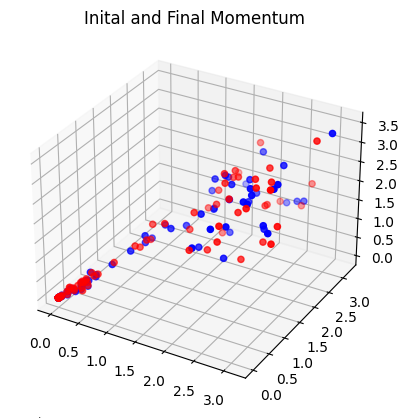

In [3]:
'''
Mometum analysis and plot
This block willL:
- groups up the velocity arrays and mass of the array and seperates them by their frames which will allow us to track the momentum
of each star frame  by frame
- Create momentum Arrays that are frame (time) dependent
- plot the momentum of the stars in the inital frame and the momentum of the stars in the final frame
- create an animation to show the momentum over the span of the simulation.

'''
dt = df['frame']
groups = df.groupby("frame")
for momentum, group in groups:
   # Get the x, y, and z functions from the group
   vel_x = group["vel_x"]
   vel_y = group["vel_y"]
   vel_z = group["vel_z"]
   mass = group['mass']
   px = mass * vel_x
   py = mass * vel_y
   pz = mass * vel_z
   ptn = 'pt{}'.format(momentum)
   # Assign the functions to the variable in the global namespace
   globals()[ptn] = np.vstack([px, py, pz])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt1[0], pt1[1], pt1[2], color='blue')
ax.scatter(pt225[0], pt225[1], pt225[2], color='red')
plt.title('Inital and Final Momentum', loc = 'center')




In [ ]:
'''
Momentum Animation
This section plots all the momentum of the stars for all 225 frames and exports a gif to show the change in momentum from frame to frame
However there are two caviots:
- The production of this animation takes a very long time
- the animation shows little to no change as depicted in the plot of the inital and final momentum
'''
pts = ["pt{}".format(momentum) for momentum in range(1, 225)]
for ptn in pts:
    # Evaluate the variable name as a Python expression

    var = eval(ptn)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(var[0], var[1], var[2], color='red')

def update(frame):
   for ptn in pts:
      points, = ax.plot(px, py, pz, 'o')
      # Evaluate the variable name as a Python expression
      var = eval(ptn)
      points.set_data(px, py)
      points.set_3d_properties(pz)
      fig = plt.figure()
      ax.set_xlabel('x')
      ax.set_ylabel('y')
      ax.set_zlabel('z')
      plt.title('Momentum', loc = 'left')
   return points,
anim = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
anim.save('momentum.gif', writer='pillow', fps = 20)


* Results of COM calculation

The aim of doing a center of mass analysis was to examine how the position and mass of the stars in our simulation changed from frame to frame. To ensure the validity of the simulation, we assumed that the mass of the stars remained constant, and only the position of the stars varied due to the perturbation. To perform this analysis, we grouped the stars by their frame number, from 1 to 225, and calculated the center of mass of the system for each frame, using the center of mass function:


rcm​=1/M∑(mi)(​r​i)


where rcm​ is the position vector of the center of mass, M is the total mass of the system, mi​ is the mass of the i-th body, and ri​ is the position vector of the i-th body1

This resulted in a set of vectors that represented the center of mass of the system with respect to time (frame). We expected to see a linear change in the center of mass of the system from frame to frame, as the system moved as a whole due to the inital external force. To visualize this, we plotted the first and the last center of mass vectors, marked with green and red respectively, and then plotted all the intermediate center of mass vectors, marked with blue. We then created an animation to observe the system’s change over time. We did not find any significant deviations or fluctuations in the center of mass vectors, which indicated that the simulation was consistent and realistic, and that the center of mass of the system was conserved throughout the simulation.


* Resutlts for the momentum analysis.

One of the objectives of our simulation was to test whether the momentum of the system was conserved throughout the perturbation of the stars. This would help us verify that the simulation was running accurately from start to finish, and that there were no errors or anomalies in the data. To perform this analysis, we calculated the three-dimensional momentum of each star within each frame, using their velocity and mass values. We did this for all the frames, from 1 to 225, and obtained a set of arrays that represented the momentum of each star at each time step. We then plotted these arrays and created an animation to visualize the changes in the momentum of the stars over time. We were looking for any signs of inconsistency or deviation from the expected behavior of the system, such as sudden jumps or drops in the momentum values. Since we did not find any such discrepancies, we concluded that the simulation was consistent and reliable, and that the momentum of the system was conserved throughout the simulation.